<a href="https://colab.research.google.com/github/cyclingdata/tensorflow_practice_coursera/blob/master/Course_3_Week_2_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)


1.15.2


In [16]:
# Uncomment and run this if you don't have TensorFlow 2.0x [Check for latest 2.0 instructions at https://www.tensorflow.org/versions/r2.0/api_docs/python/tf]
!pip install tensorflow==2.0.0
!pip install -q tensorflow-datasets


  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1


In [17]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [22]:
imdb

{'test': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <_OptionsDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [0]:
tokenizer = info.features['text'].encoder

In [23]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [9]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [25]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [26]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [32]:
num_epochs = 10

train_data = train_data.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
test_data = test_data.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10
25000/25000 [==============================] - 274s 11ms/step - loss: 0.6848 - accuracy: 0.5344 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 207s 8ms/step - loss: 0.6833 - accuracy: 0.5410 - val_loss: 0.6842 - val_accuracy: 0.5385
Epoch 3/10
25000/25000 [==============================] - 207s 8ms/step - loss: 0.6824 - accuracy: 0.5443 - val_loss: 0.6841 - val_accuracy: 0.5398
Epoch 4/10
25000/25000 [==============================] - 208s 8ms/step - loss: 0.6817 - accuracy: 0.5457 - val_loss: 0.6842 - val_accuracy: 0.5401
Epoch 5/10
25000/25000 [==============================] - 211s 8ms/step - loss: 0.6813 - accuracy: 0.5465 - val_loss: 0.6844 - val_accuracy: 0.5398
Epoch 6/10
25000/25000 [==============================] - 212s 8ms/step - loss: 0.6810 - accuracy: 0.5469 - val_loss: 0.6846 - val_accuracy: 0.5399
Epoch 7/10
25000/25000 [==============================] - 213s 9ms/step - loss: 0.6808 - accuracy: 0.54

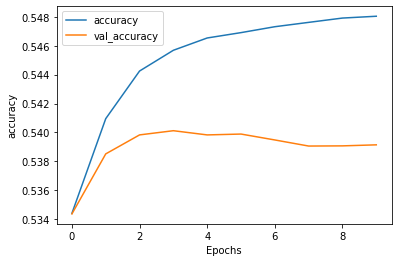

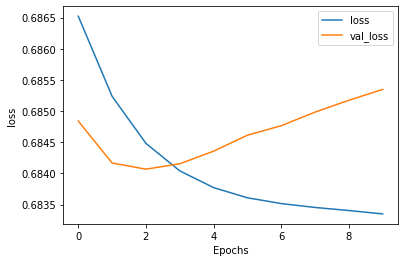

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)
